# LABORATORIO 3

## Integrantes

### INTEGRANTES DEL EQUIPO
* MARIA PAULA MOGOLLON
* SERGIO NICOLAS QUINTERO
* LIDA VIVIANA PINEDA
* CRISTIAN CAMILO CARDENAS RODRIGUEZ

#### OBJETIVOS QUE ESPERAMOS ALCANZAR EN ESTE ANALISIS

Se busca establecer si el proyecto de ciudadano digital, si llego a sus objetivos, y a su vez entender el tipo de población que ingreso a estos


##### KPI DEL PROYECTO
* Tasa de Registro por Género: Porcentaje de registros por género. ok
Fórmula: (Número de registros de un género específico / Total de registros) * 100  
    * Diagrama de pastel
  
* Tasa de registro por nivel educativo: Porcentaje de registros agrupados por nivel educativo. ok
    * Diagrama de pastel
  
* Kpi relacionando nivel educativo y genero ok
    * Diagrama de barras
  
* Kpi relacionar, violencia con Lgbti - OK
    * Diagrama de dispersion - pastel
  
* Kpi Servidores publicos que tomaron el curso - OK
    * Diagrama de pastel
  
* Kpi nivel educativo, la columna tipo y grupo étnico - ok
    * Diagrama de barras - columnas apiladas - correlación

* Kpi personas con discapacidad visual y su ocupación - ok
    * Torta - Barras apiladas - "Tabla"

* Kpi Discapacidad por genero -- revisar sino cambiar gráfico - por genero y discapacidad - ok
    * Matriz de correlacion

* Kpi Nivel educativo vs año de fecha de corte - ok
    * Graficas de linea relacionando el tiempo de fecha corte o cantidad registro o vigencia (punto,ejes)


>  Se realiza la carga de las librerias para poder iniciar con el proceso de analisis gráfico de Ciudadano Digital

In [1]:
#Importacion de librerias 
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3

> Se realiza la carga del CSV que quedo de resultado del filtro de los datos

In [6]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    df_Ciudadania_digital = pd.read_csv('C:/Users/User/Documents/ejercicios python/Laboratorio2/data/Ciudadano_Digital.csv')

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente.")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
    
    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:
    
    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente.


## INICIO DE GRAFICAS PARA REVISAR LOS KPI PROPUESTOS

### Gráfica de las personas, que por genero, ingresaron a los cursos de Ciudado Digital

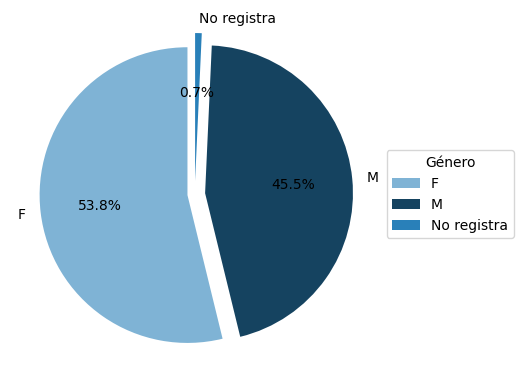

In [7]:
# generar conteo de registros por valor único en la columna GENERO
df_genero = df_Ciudadania_digital['GENERO'].value_counts()

# establecer etiquetas y colores
etiquetas = df_genero.index
colores = ['#7FB3D5','#154360','#2980B9']
explode = [0.05,0.07,0.09]
# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=explode)

# agregar leyenda
plt.legend(title='Género', loc='center left', bbox_to_anchor=(1.0, 0.5))

# mostrar gráfico
plt.show()

> Conclusión de la primera gráfica
> * Se observa que estos cursos fueron todamos mas por mujeres que por hombres
> * Se observa que hay una pequeña población que no indica, o no se identifican como mujer o como hombre

### Grafica que indica hasta que nivel de estudio han llegado las personas que ingresan al proyecto

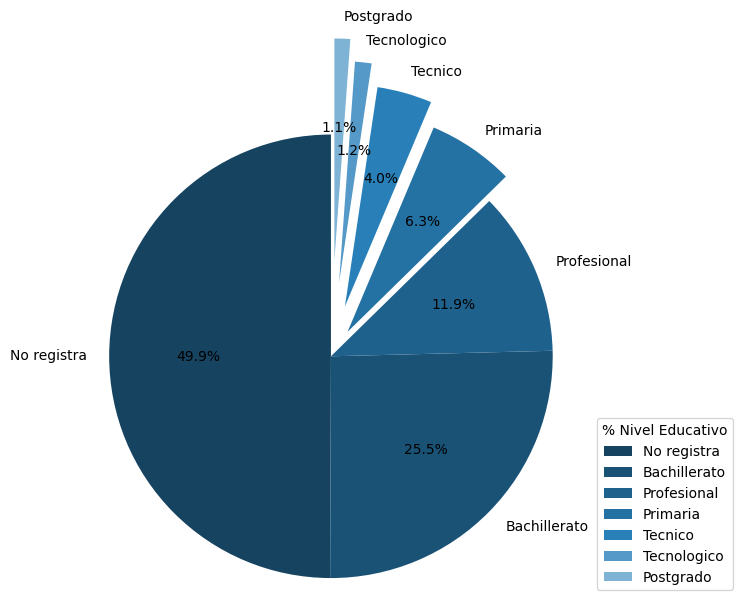

In [8]:
# Combinar las categorías "Especialización", "Maestría" y "Doctorado"
df_Ciudadania_digital['NIVEL EDUCATIVO'] = df_Ciudadania_digital['NIVEL EDUCATIVO'].replace(['Especializacion', 'Maestria', 'Doctorado'], 'Postgrado')

# Generar el conteo de registros por valor único en la columna ESTU_GENERO
df_nivel_educativo = df_Ciudadania_digital['NIVEL EDUCATIVO'].value_counts()

# Establecer etiquetas y colores
etiquetas = ['No registra','Bachillerato','Profesional','Primaria', 'Tecnico', 'Tecnologico', 'Postgrado']
colores = ['#154360','#1A5276','#1F618D','#2471A3','#2980B9','#5499C7','#7FB3D5']
explode = [0,0,0,0.2,0.35,0.5,0.65]

# Crear gráfico de torta
plt.pie(df_nivel_educativo, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, radius=1.5, explode=explode)

# Agregar leyenda
plt.legend(title='% Nivel Educativo', loc='center left', bbox_to_anchor=(1.2, 0.1))

# Mostrar gráfico
plt.show()

> Conclusión de la segunda gráfica
> * Se observa que casi la mitad de la poblacion no informa hasta que grado de educacion ha tomado, esto puede estar relacionado con el echo que el nivel mas bajo dentro del anàlisis es primaria, y esposible que algunos no hallan cursado ningún grado.
> * La población que cuenta con educación superior es una minoria de la población

### Grafica que indica hasta que nivel de estudio tienen las personas, según genero, dentro de las personas que tomaron las capacitaciones.

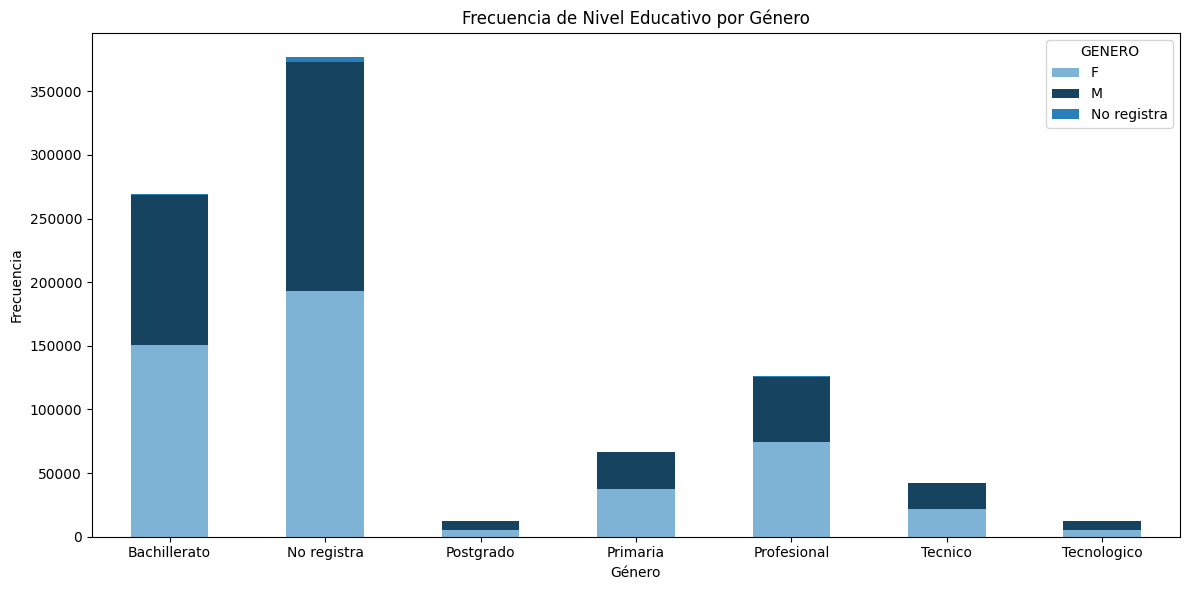

In [9]:
# Obtener valores únicos y frecuencia 
nivel_educativo_counts = df_Ciudadania_digital.groupby('NIVEL EDUCATIVO')['GENERO'].value_counts().unstack()
colors = {'F': '#7FB3D5', 'M': '#154360', 'No registra': '#2980B9'}

# Crear la gráfica de barras apiladas con colores personalizados
nivel_educativo_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[column] for column in nivel_educativo_counts.columns if column in colors])

# Títulos y etiquetas
plt.title('Frecuencia de Nivel Educativo por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Conclusión de la tercera gráfica
> * Si no incluimos los no registra, el segundo grupo que presenta mas personas con estudio son los bachilleres, donde la mayor población se encuentra registrada por las mujeres.
> * A nivel de personas que no registran, tambien se obserga un grupo mayyor de mujeres.

### Grafica que indica por sexo, cuantas personas de comundiades etnicas tomaron el curso

In [10]:
df_Ciudadania_digital['COMUNIDAD ETNICA'].value_counts()

COMUNIDAD ETNICA
NINGUNO              500829
INDIGENAS             24791
AFRODESCENDIENTES     19154
PALENQUEROS             461
ROM                     434
RAIZAL                  373
Name: count, dtype: int64

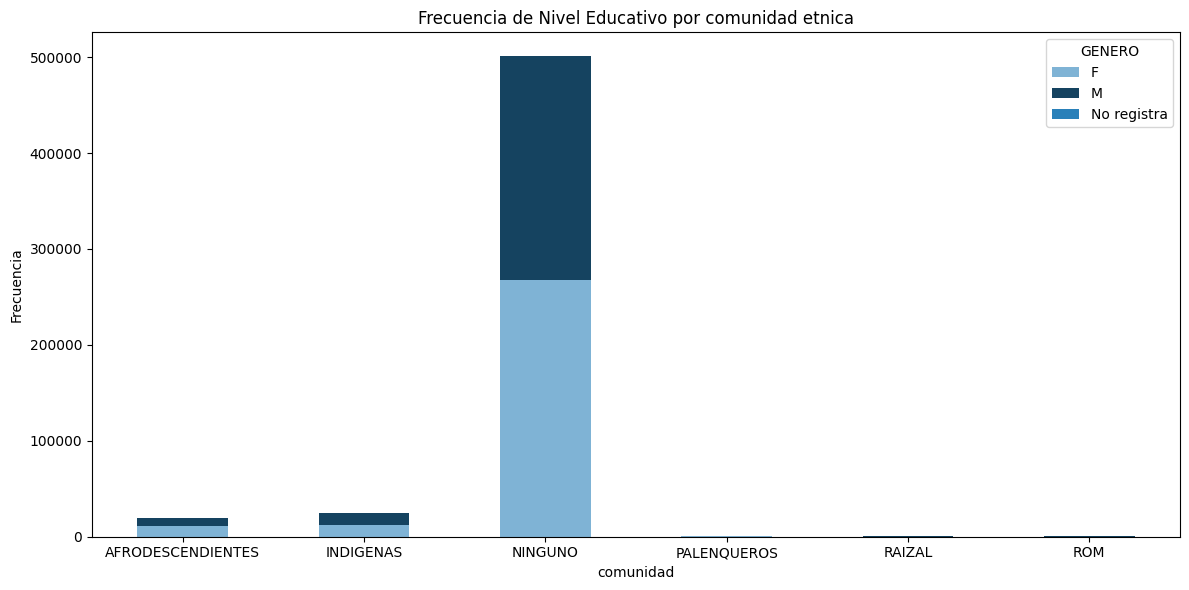

In [13]:
# Obtener valores únicos y frecuencia 
nivel_educativo_counts = df_Ciudadania_digital.groupby('COMUNIDAD ETNICA')['GENERO'].value_counts().unstack()
colors = {'F': '#7FB3D5', 'M': '#154360', 'No registra': '#2980B9'}

# Crear la gráfica de barras apiladas con colores personalizados
nivel_educativo_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[column] for column in nivel_educativo_counts.columns if column in colors])

# Títulos y etiquetas
plt.title('Frecuencia de Nivel Educativo por comunidad etnica')
plt.xlabel('comunidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles

# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Conclusión de la cuarta gráfica
> * Se observa que, aunque son las mas personas que no se identifican con las comundiades etnicas establecidas, el curso si fue tomado, a nivel de comunidades, por afrodescendientes e indigenas.
> * Se observa una baja participacion de comunidades como raizales, rom, y palenqueros, por lo que se identifica que se debe tener un mayor contacto, entre las tic y las personas de diferentes comunidades.

### Grafica que indica el tipo de capacitacion que tuvieron los servidores publicos

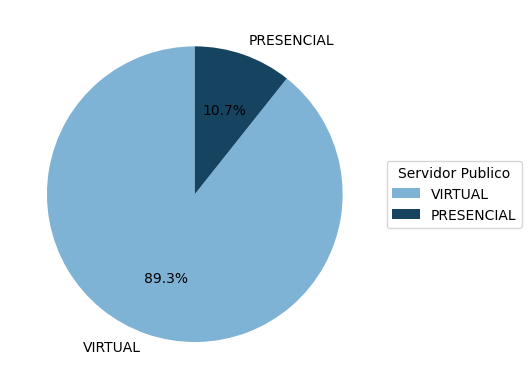

In [14]:
#Kpi Servidores publicos vs la forma en que tomaron el curso.
# generar conteo de registros por valor único en la columna GENERO
df_servidor_publico = df_Ciudadania_digital[df_Ciudadania_digital['OCUPACION'] == 'Servidor Publico']	
# Contar la cantidad de registros por valor único en la columna OCUPACION
ocupacion_counts = df_servidor_publico['TIPO'].value_counts()
# Establecer etiquetas y colores
etiquetas = ocupacion_counts.index
colores = ['#7FB3D5', '#154360']
# Crear gráfico de torta
plt.pie(ocupacion_counts, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)
# Agregar leyenda
plt.legend(title='Servidor Publico', loc='center left', bbox_to_anchor=(1.0, 0.5))
# Mostrar gráfico
plt.show()

> Conclusión de la quinta gráfica
> * La Mayoria de servidores pubicos tomaron los cursos de manera virtual
> * Se observa que estos cursos también fueron tomados por personas, que por su función de servidor público, se encuentra relacionado con la inclusión de estas personas, para mejorar la atención de los estudiantes.

### Grafica de violencia, por comunidad etnica.

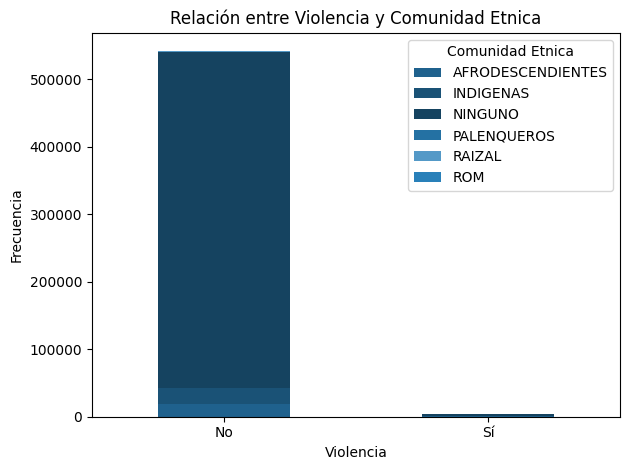

In [15]:
# Conteo de las combinaciones de respuestas
combinaciones = df_Ciudadania_digital.groupby(['VICTIMA DE VIOLENCIA', 'COMUNIDAD ETNICA']).size().unstack()
# Crear el gráfico de barras apiladas
combinaciones.plot(kind='bar', stacked=True, color=['#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'])
# Títulos y etiquetas
plt.title('Relación entre Violencia y Comunidad Etnica')
plt.xlabel('Violencia')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
# Mostrar la gráfica
plt.legend(title='Comunidad Etnica')
plt.tight_layout()
plt.show()

> Conclusión de la sexta gráfica
> * La mayoria de personas que tomaron el curso, no se encuentran catalogadas dentro del grupo de personas que sufren violencia.
> * Se observa un indice bajo de personas que han sufrido violencia

### Grafica de la relacion del tipo de educacion que recibieron, si presencial o virtual, según grupo etnico

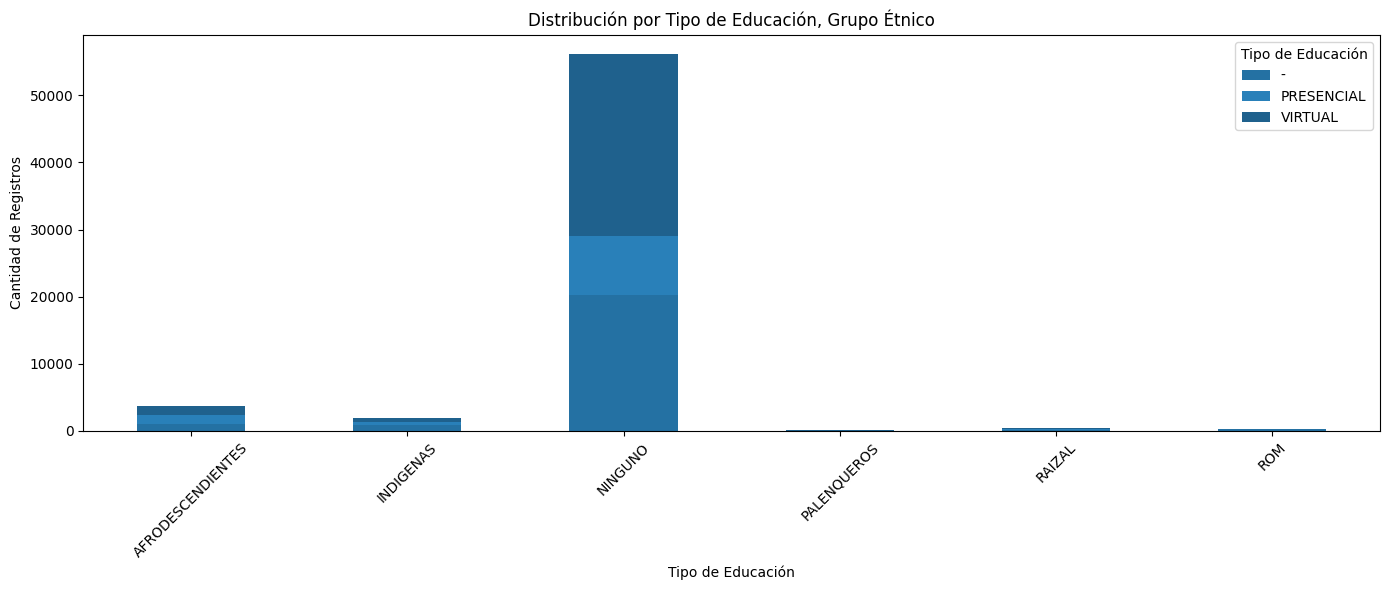

In [16]:
 #columna tipo y grupo étnico
# Agrupar los datos por las categorías de interés y contar el número de registros
agrupacion = df_Ciudadania_digital.groupby(['COMUNIDAD ETNICA','TIPO']).size().unstack()
colors = { '#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'}
# Crear el gráfico de barras apiladas
agrupacion.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

# Personalizar el gráfico
plt.title('Distribución por Tipo de Educación, Grupo Étnico')
plt.xlabel('Tipo de Educación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Tipo de Educación')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


> Conclusión de la septima gráfica
> * la mayor poblacion tomo el curso de manera virtual
> * Hay un registro dentro de la información seleccionada que no indica el tipo de educación, dato que genera ruido dentro del analisis.

### Grafica de nivel educativo en comunidad etnica

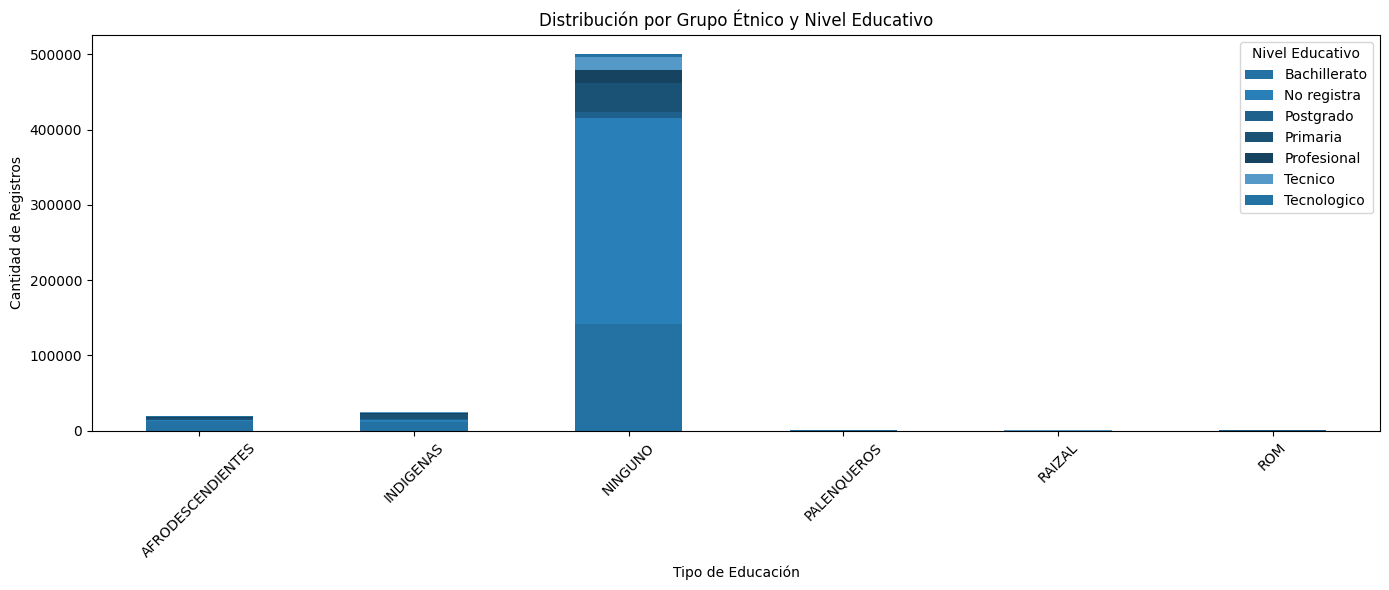

In [17]:
#Nivel educativo vs Comunidad Etnica
# Agrupar los datos por las categorías de interés y contar el número de registros
agrupacion = df_Ciudadania_digital.groupby(['COMUNIDAD ETNICA','NIVEL EDUCATIVO']).size().unstack()
colors = { '#1F618D', '#1A5276',  '#154360', '#2471A3',  '#5499C7','#2980B9'}
# Crear el gráfico de barras apiladas
agrupacion.plot(kind='bar', stacked=True, figsize=(14, 6), color=colors)

# Personalizar el gráfico
plt.title('Distribución por Grupo Étnico y Nivel Educativo')
plt.xlabel('Tipo de Educación')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend(title='Nivel Educativo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


> Conclusión de la octava gráfica
> * Segùn el indice, los afro e indigenas tienen porcentajes diversos dentro de la educaciòn  a la que ingresan.
> * Los ROM, sigue siendo una de las comunidades con memor visibilidad dentro de las otras comundiades dentro de todas las gráficas

### Grafica con las 20 profesiones que presentan mayor discapacidad visual

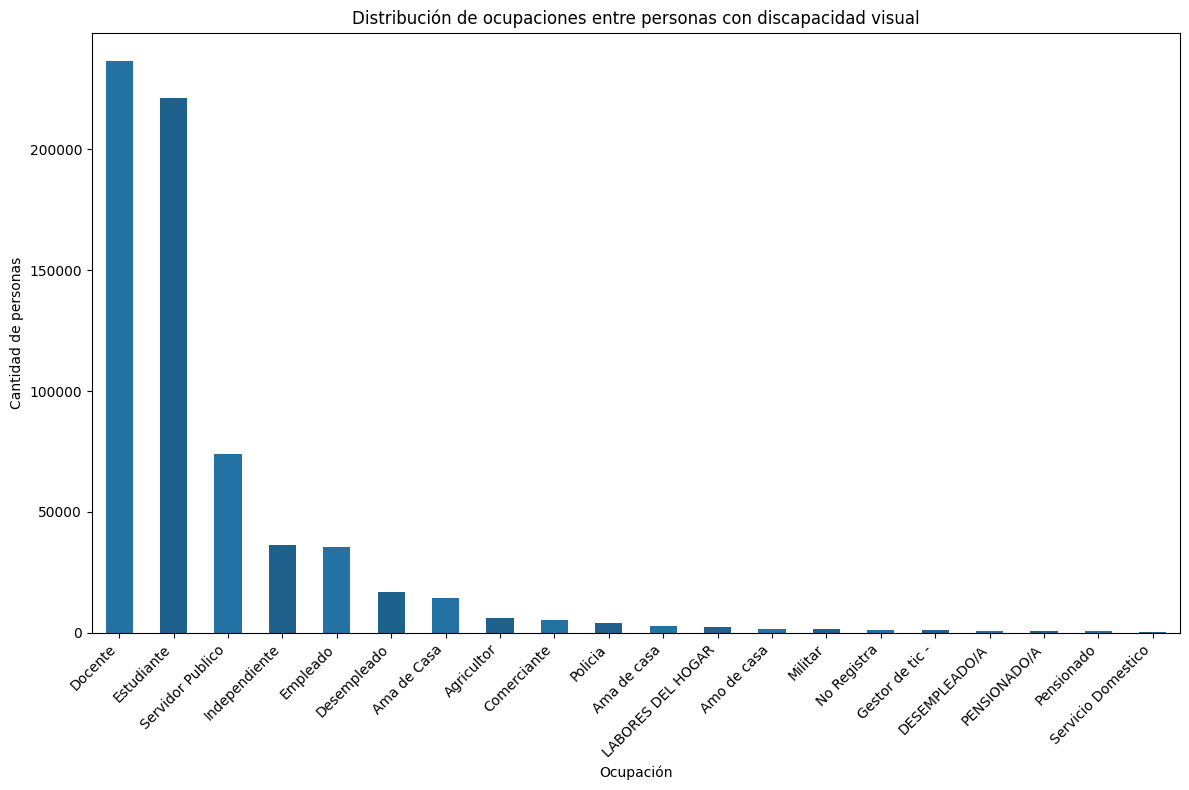

In [18]:
# Filtrar el DataFrame para obtener solo las personas con discapacidad visual
df_discapacidad_visual = df_Ciudadania_digital[df_Ciudadania_digital['DISCAPACIDAD'] == 'Discapacidad Visual']
# Contar la cantidad de personas en cada ocupación
ocupacion_counts = df_Ciudadania_digital['OCUPACION'].value_counts().head(20)
# Colores proporcionados
colores = ['#2471A3', '#1F618D']
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = ocupacion_counts.plot(kind='bar', color=colores)
# Personalizar el gráfico
plt.title('Distribución de ocupaciones entre personas con discapacidad visual')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

> Conclusión de la novena gráfica
> * Segùn el grafico las personas con mayor problema visual son los docentes, seguido de estudiantes y servidores publicos.
> * Esto presenta como la discapacidad visual es un problema considerable de salud pública

### Grafica con las 20 profesiones que presentan mayor discapacidad mental

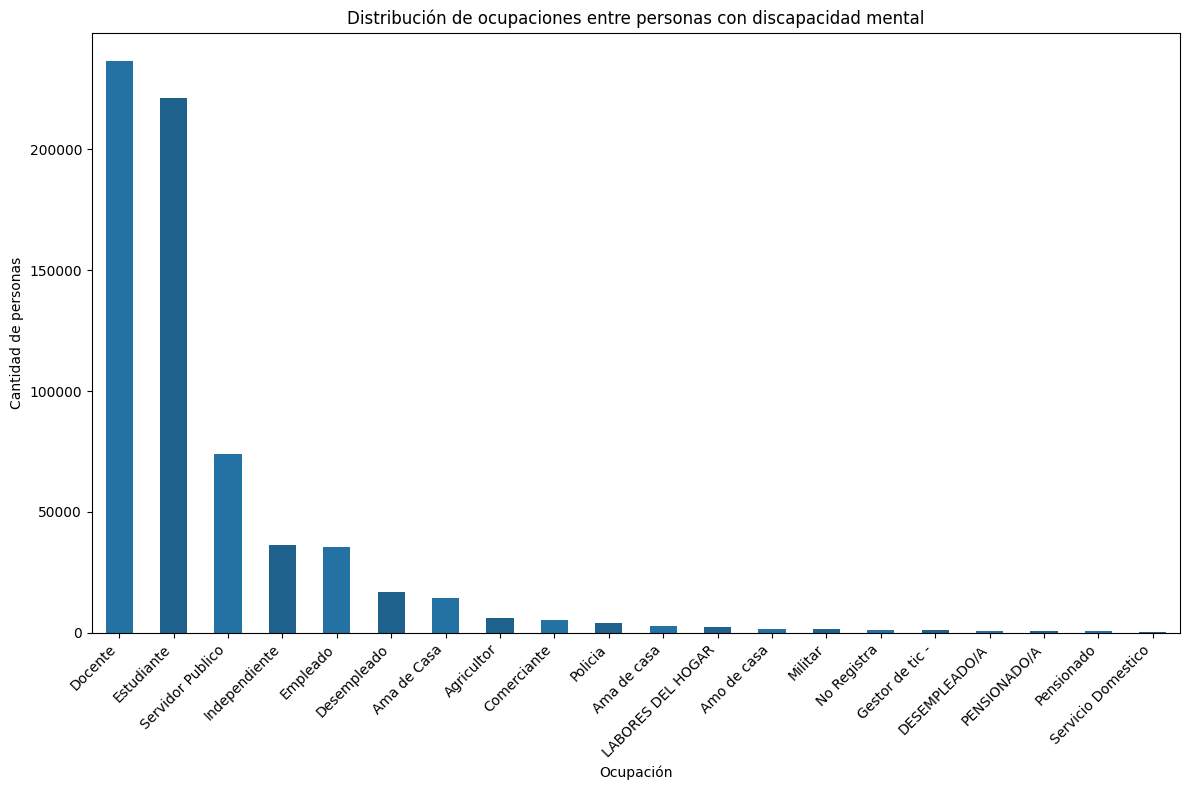

In [22]:
# Filtrar el DataFrame para obtener solo las personas con discapacidad visual
df_discapacidad_visual = df_Ciudadania_digital[df_Ciudadania_digital['DISCAPACIDAD'] == 'Discapacidad Mental']
# Contar la cantidad de personas en cada ocupación
ocupacion_counts = df_Ciudadania_digital['OCUPACION'].value_counts().head(20)
# Colores proporcionados
colores = ['#2471A3', '#1F618D']
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = ocupacion_counts.plot(kind='bar', color=colores)
# Personalizar el gráfico
plt.title('Distribución de ocupaciones entre personas con discapacidad mental')
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Mostrar el gráfico
plt.show()

> Conclusión de la decima gráfica
> * En esta grafica se presenta un paralelismo con la de problemas visuales, siendo también, las enfermedades de salud mental, como otro foco para la salud.

### Grafica de discapacidades por genero

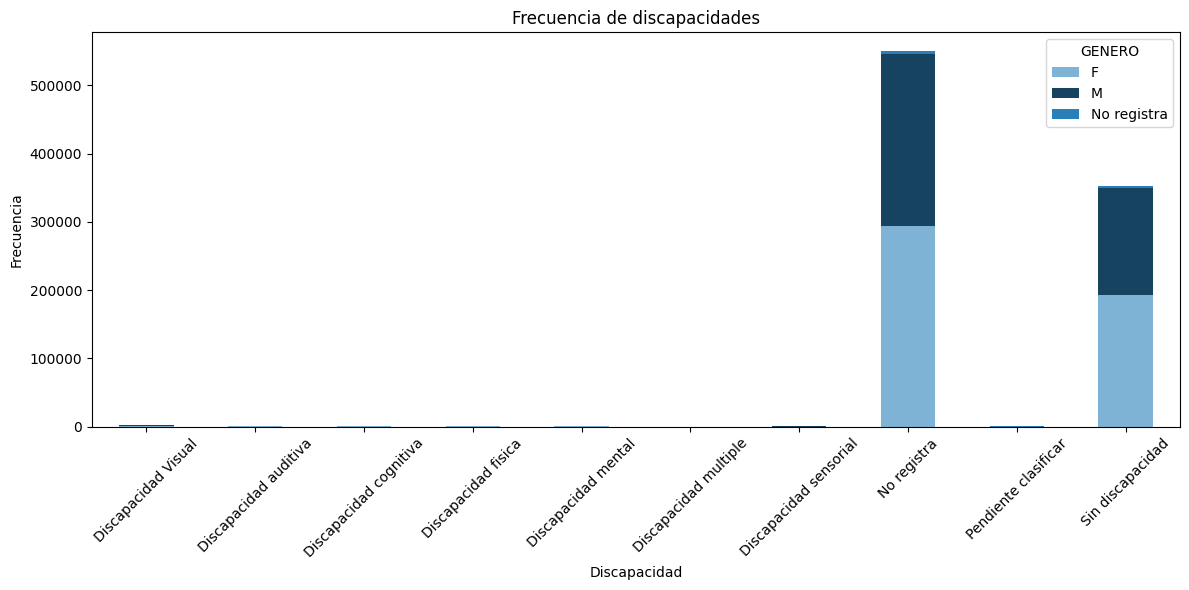

In [19]:
#Validacion de discapacidades por genero
disc_por_genero = df_Ciudadania_digital.groupby('DISCAPACIDAD')['GENERO'].value_counts().unstack()
disc_por_genero
# Colores 
colors = {'F': '#7FB3D5', 'M': '#154360', 'No registra': '#2980B9'}
# Crear la gráfica de barras apiladas con colores personalizados
disc_por_genero.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[column] for column in disc_por_genero.columns])
# Títulos y etiquetas
plt.title('Frecuencia de discapacidades')
plt.xlabel('Discapacidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que sean legibles
# Mostrar la gráfica
plt.tight_layout()
plt.show()

> Conclusión de la Onceava gráfica
> * Se evidencia, que es baja la poblaciòn que indica si tiene discapacidad, pero que todas, excepto la multiple, tiene minimo u na persona que lo presenta.
> * Las discapacidades, se presentan mas en mujeres que en hombres.

### Grafica de personas por nivel educativo, inscritas en los diferentes años

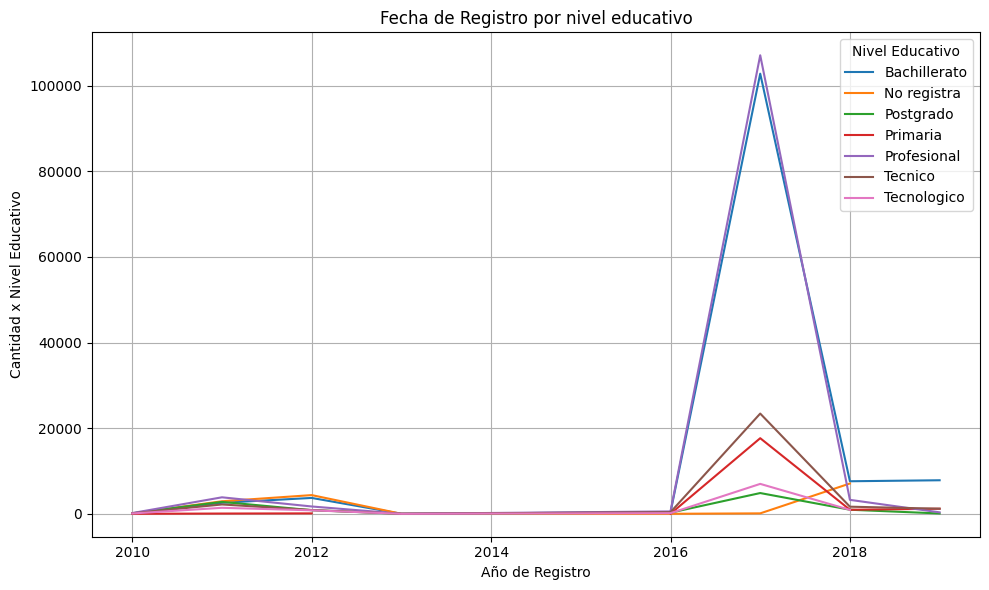

In [23]:
#Validacion de personas inscritas por año, y sus profesiones.
NE_por_FE = df_Ciudadania_digital.groupby('FECHA DE REGISTRO')['NIVEL EDUCATIVO'].value_counts().unstack()
NE_por_FE = pd.DataFrame(data=NE_por_FE)

NE_por_FE.plot(kind='line', figsize=(10, 6))
plt.title('Fecha de Registro por nivel educativo')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad x Nivel Educativo')
plt.grid(True)
plt.legend(title='Nivel Educativo')
#plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


> Conclusión de la Doceava gráfica
> * Aunque el plan de ciudadano digital se viene dando desde 2010, se observa un salto en participacion dentro del año 2016 al 2018.
> * e observa que mas profesionales, durante estos años, deciden tomar estos cursos para su propia vida profesional.

### Grafica de personas por nivel educativo segun año que registra de nacimiento

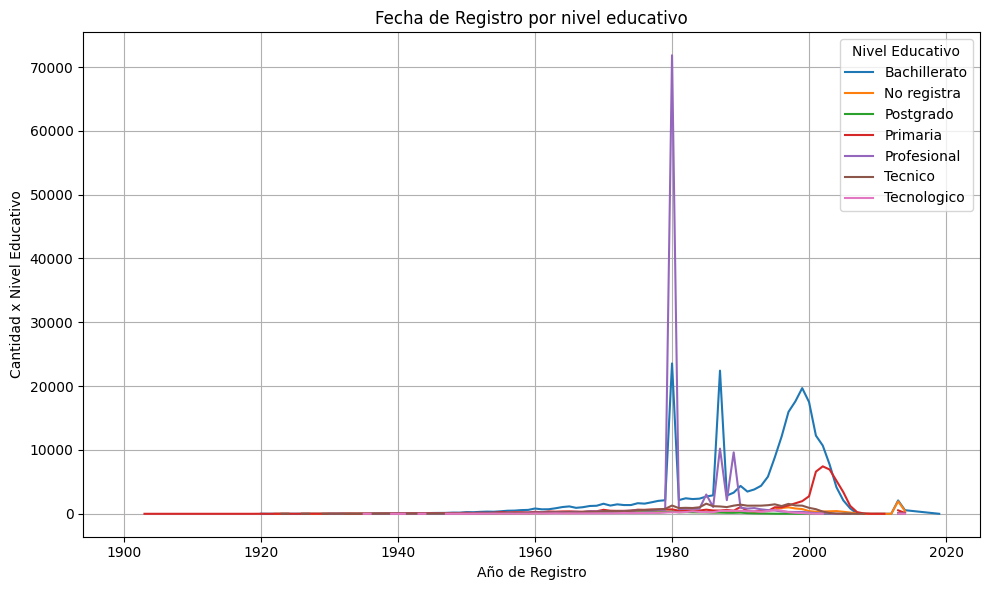

In [24]:
#Validacion de personas inscritas por año, y sus profesiones.
NE_por_FE = df_Ciudadania_digital.groupby('FECHA DE NACIMIENTO')['NIVEL EDUCATIVO'].value_counts().unstack()
NE_por_FE = pd.DataFrame(data=NE_por_FE)

NE_por_FE.plot(kind='line', figsize=(10, 6))
plt.title('Fecha de Registro por nivel educativo')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad x Nivel Educativo')
plt.grid(True)
plt.legend(title='Nivel Educativo')
#plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

> Conclusión de la Treceava gráfica
> * Al ver la grafica por año depersonas registradas, prima la primaria.
> * Se observa un salto de personas profesionales que nacieron durante 1080
> * A partir de 1960, se observa una variación de las personas que sonn bachilleres, indicando que dentro de estos años se encuentra la mayor población que no alcanzaron educación superior.

## CONCLUSIONES GENERALES

> * Según los datos encontrados de Ciudadano Digbital, este afecta, en su mayoria a personas que no tienen educación superior.
> * la diferencia entre mujeres y hombres que toman este tipo de cursos no es mayor a un 5%
> * Aunque se tienen registros minimos de inicapacidades, como de personas que presentan violencia, se oberva como estos indicadores son importantes, en cuanto a la afectación, y a la aceptación de estos cursos para llegar a la comunidad general.
> * Se observa en la edad de los participantes, como en su educación, una relación directa a las oportunidades brindadas de educación.